In [ ]:
import ee
from IPython.display import Image
import matplotlib.pyplot as plt

In [2]:
ee.Authenticate(0)

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=64elQ5ilBvWS11y9QYQu1lf8fSC7ayk66Gz8PJK2hB8&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/yQFrLq8SHTSVy613uA3Svpth1A9dHXnjm4sZ3peji6YAsZlfRzVqlxg

Successfully saved authorization token.


In [ ]:
ee.Initialize()

In [ ]:
img=ee.Image('LANDSAT/LT05/C01/T1_SR/LT05_034033_20000913')


In [5]:
print(img)

ee.Image({
  "type": "Invocation",
  "arguments": {
    "id": "LANDSAT/LT05/C01/T1_SR/LT05_034033_20000913"
  },
  "functionName": "Image.load"
})


In [6]:
print(img.getInfo())

{'type': 'Image', 'bands': [{'id': 'B1', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': -32768, 'max': 32767}, 'dimensions': [7961, 7301], 'crs': 'EPSG:32613', 'crs_transform': [30, 0, 270285, 0, -30, 4414815]}, {'id': 'B2', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': -32768, 'max': 32767}, 'dimensions': [7961, 7301], 'crs': 'EPSG:32613', 'crs_transform': [30, 0, 270285, 0, -30, 4414815]}, {'id': 'B3', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': -32768, 'max': 32767}, 'dimensions': [7961, 7301], 'crs': 'EPSG:32613', 'crs_transform': [30, 0, 270285, 0, -30, 4414815]}, {'id': 'B4', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': -32768, 'max': 32767}, 'dimensions': [7961, 7301], 'crs': 'EPSG:32613', 'crs_transform': [30, 0, 270285, 0, -30, 4414815]}, {'id': 'B5', 'data_type': {'type': 'PixelType', 'precision': 'int', 'min': -32768, 'max': 32767}, 'dimensions': [7961, 7301], 'crs': 'EPSG:32613', 'crs_transform': [30, 0, 2702

In [7]:
Image(url=img.getThumbURL({'bands':['B4','B3','B2'], 'min':100,'max':3500,
                           'region':[[[-75.67086291359112,6.072916792136425],
                                      [-75.25475573585675,6.072916792136425],
                                      [-75.25475573585675,6.380084130088567],
                                      [-75.67086291359112,6.380084130088567]]]}))

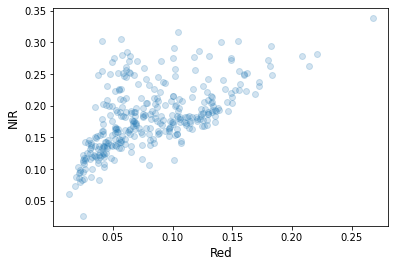

In [8]:
# Select Red and NIR bands, scale them, and sample 500 points.
samp_fc = img.select(['B3','B4']).divide(10000).sample(scale=30, numPixels=500)

# Arrange the sample as a list of lists.
samp_dict = samp_fc.reduceColumns(ee.Reducer.toList().repeat(2), ['B3', 'B4'])
samp_list = ee.List(samp_dict.get('list'))

# Save server-side ee.List as a client-side Python list.
samp_data = samp_list.getInfo()

# Display a scatter plot of Red-NIR sample pairs using matplotlib.
plt.scatter(samp_data[0], samp_data[1], alpha=0.2)
plt.xlabel('Red', fontsize=12)
plt.ylabel('NIR', fontsize=12)
plt.show()